In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version  1.0.5
Version:  0.0.23


In [2]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.2)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


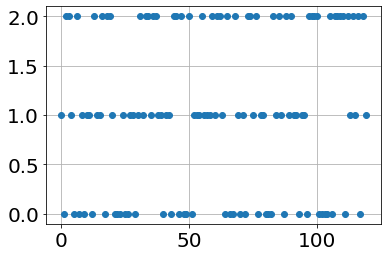

In [6]:
plot(data_train.targets,'o')

In [3]:
C=NumPyNetBackProp({
    'input':4,               # number of features
    'hidden':[(5,'logistic'),],
    'output':(3,'logistic'),  # number of classes
    'cost':'mse',
})

In [4]:
C.fit(data_train.vectors,data_train.targets,epochs=10)

100%|██████████| 10/10 [00:00<00:00, 516.50it/s]

layer       filters  size              input                output
   0 input                   120 x   1 x   1 x   4   ->   120 x   1 x   1 x   4
   1 connected               120 x   1 x   1 x   4   ->   120 x   5
   2 connected               120 x   1 x   1 x   5   ->   120 x   3
   3 cost                    120 x   1 x   1 x   3   ->   120 x   1 x   1 x   3


In [5]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 34.166666666666664
On Test Set: 30.0


In [6]:
C.weights

[array([[-0.44725955, -0.29263468,  0.50508442,  0.15049484, -0.0867177 ],
        [-0.47538365,  0.62809728, -0.32208773,  0.00701143,  0.34415224],
        [-0.04076792, -0.05447881, -0.23740877, -0.34005291, -0.16831872],
        [-0.08719839,  0.00485883,  0.61025112, -0.41995203,  0.49923404]]),
 array([[ 0.14587798,  0.26961972, -0.11078303],
        [-0.14612502, -0.09651317,  0.0475195 ],
        [-0.08973082, -0.32870348, -0.20596466],
        [-0.31278685, -0.38617267, -0.4174537 ],
        [ 0.48110505, -0.02633011, -0.52026319]])]

## XOR Problem - Perceptron

In [7]:
data=make_dataset(bob=[[0,0],[1,1]],sally=[[0,1],[1,0]])

In [8]:
data

{'vectors': array([[0, 0],
        [1, 1],
        [0, 1],
        [1, 0]]),
 'targets': array([0, 0, 1, 1]),
 'target_names': ['bob', 'sally'],
 'feature_names': ['0', '1']}

In [9]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'output':(2,'linear'),  # number of classes
    'cost':'mse',
})

In [10]:
C.fit(data.vectors,data.targets)

 12%|█▏        | 115/1000 [00:00<00:00, 1146.43it/s]

layer       filters  size              input                output
   0 input                     4 x   1 x   1 x   2   ->     4 x   1 x   1 x   2
   1 connected                 4 x   1 x   1 x   2   ->     4 x   2
   2 cost                      4 x   1 x   1 x   2   ->     4 x   1 x   1 x   2


100%|██████████| 1000/1000 [00:00<00:00, 1410.77it/s]


In [11]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))

[0 1 0 1]
('On Training Set:', 50.0)


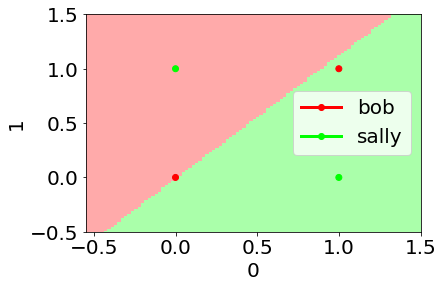

In [12]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

## XOR Problem - Backprop

In [13]:
data.vectors

array([[0, 0],
       [1, 1],
       [0, 1],
       [1, 0]])

In [14]:
data.targets

array([0, 0, 1, 1])

In [15]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'hidden':[(5,'logistic'),],
    'output':(2,'logistic'),  # number of classes
    'cost':'mse',
})

In [16]:
C.fit(data.vectors,data.targets,epochs=3000)

  2%|▏         | 70/3000 [00:00<00:04, 691.96it/s]

layer       filters  size              input                output
   0 input                     4 x   1 x   1 x   2   ->     4 x   1 x   1 x   2
   1 connected                 4 x   1 x   1 x   2   ->     4 x   5
   2 connected                 4 x   1 x   1 x   5   ->     4 x   2
   3 cost                      4 x   1 x   1 x   2   ->     4 x   1 x   1 x   2


100%|██████████| 3000/3000 [00:03<00:00, 879.82it/s]


In [17]:
print((C.predict(data.vectors)))
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))


[0 0 1 1]
('On Training Set:', 100.0)


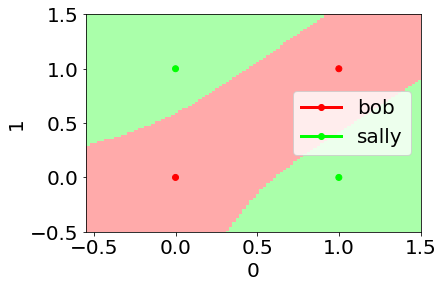

In [18]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

In [19]:
print((data.vectors))
print()
print((data.targets))

[[0 0]
 [1 1]
 [0 1]
 [1 0]]

[0 0 1 1]


In [20]:
C.output(data.vectors)

[array([[0.11743481, 0.90026722, 0.14942884, 0.92624124, 0.50742991],
        [0.1235803 , 0.93382457, 0.10866306, 0.92729465, 0.99763111],
        [0.77336634, 0.99825271, 0.78796057, 0.99858246, 0.96196732],
        [0.00546821, 0.18231125, 0.00573034, 0.18524335, 0.94491146]]),
 array([[0.93078047, 0.06720942],
        [0.85171917, 0.16976404],
        [0.12001947, 0.85706592],
        [0.11020585, 0.8890968 ]])]

In [21]:
h,y=C.output(data.vectors)
print(h)
print() 
print((np.round(h)))
print()
print(y)

[[0.11743481 0.90026722 0.14942884 0.92624124 0.50742991]
 [0.1235803  0.93382457 0.10866306 0.92729465 0.99763111]
 [0.77336634 0.99825271 0.78796057 0.99858246 0.96196732]
 [0.00546821 0.18231125 0.00573034 0.18524335 0.94491146]]

[[0. 1. 0. 1. 1.]
 [0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1.]]

[[0.93078047 0.06720942]
 [0.85171917 0.16976404]
 [0.12001947 0.85706592]
 [0.11020585 0.8890968 ]]


In [23]:
print(around(C.weights[0],2))
around(C.weights[1],2)

[[-3.19 -3.7  -3.42 -4.01  2.81]
 [ 3.24  4.15  3.05  4.03  3.2 ]]


array([[-3.14,  2.66],
       [ 3.6 , -2.44],
       [-3.24,  3.16],
       [ 2.63, -3.51],
       [-2.22,  2.53]])

## Curvy data

(-1.4214619722298927,
 1.1998318420196772,
 -1.3420751840139897,
 1.5328018665294387)

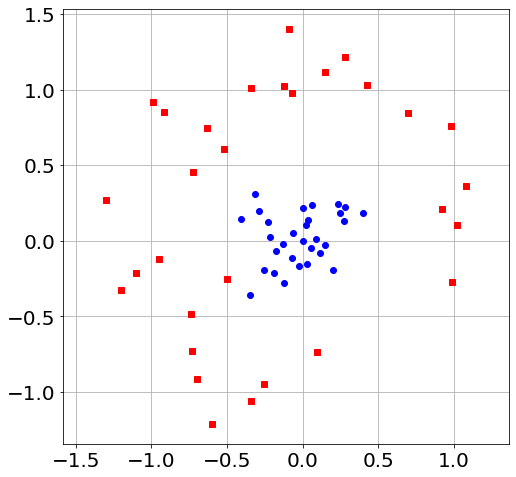

In [24]:
figure(figsize=(8,8))
N=30
x1=randn(N)*.2
y1=randn(N)*.2

plot(x1,y1,'bo')

a=linspace(0,3*pi/2,N)
x2=cos(a)+randn(N)*.2
y2=sin(a)+randn(N)*.2

plot(x2,y2,'rs')

axis('equal')

In [25]:
vectors=vstack([hstack([atleast_2d(x1).T,atleast_2d(y1).T]),
        hstack([atleast_2d(x2).T,atleast_2d(y2).T]),
        ])
targets=concatenate([zeros(N),ones(N)])
target_names=['center','around']
feature_names=['x','y']

In [26]:
data=Struct(vectors=vectors,targets=targets,
                target_names=target_names,feature_names=feature_names)

In [27]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'output':(2,'linear'),  # number of classes
    'cost':'mse',
})

 12%|█▏        | 115/1000 [00:00<00:00, 1143.07it/s]

layer       filters  size              input                output
   0 input                    60 x   1 x   1 x   2   ->    60 x   1 x   1 x   2
   1 connected                60 x   1 x   1 x   2   ->    60 x   2
   2 cost                     60 x   1 x   1 x   2   ->    60 x   1 x   1 x   2


100%|██████████| 1000/1000 [00:00<00:00, 1360.40it/s]


('On Training Set:', 70.0)


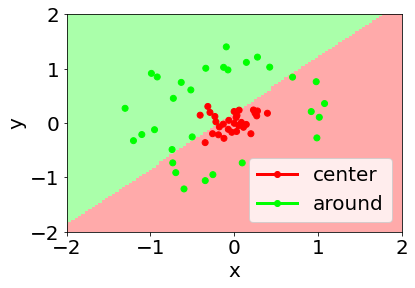

In [28]:
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

  5%|▍         | 148/3000 [00:00<00:04, 709.85it/s]

layer       filters  size              input                output
   0 input                    60 x   1 x   1 x   2   ->    60 x   1 x   1 x   2
   1 connected                60 x   1 x   1 x   2   ->    60 x   5
   2 connected                60 x   1 x   1 x   5   ->    60 x   2
   3 cost                     60 x   1 x   1 x   2   ->    60 x   1 x   1 x   2


100%|██████████| 3000/3000 [00:03<00:00, 873.27it/s]


('On Training Set:', 98.33333333333333)


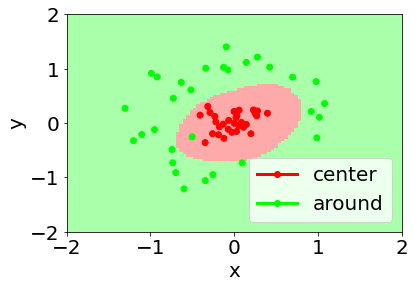

In [30]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'hidden':[(5,'logistic'),],
    'output':(2,'logistic'),  # number of classes
    'cost':'mse',
})
C.fit(data.vectors,data.targets,epochs=3000)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 98.33333333333333)


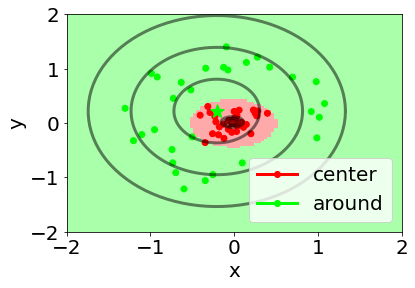

In [31]:
C=NaiveBayes()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
C.plot_centers()
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])


('On Training Set:', 98.33333333333333)


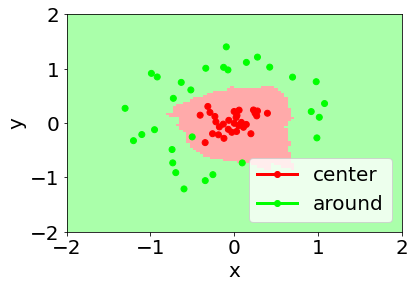

In [32]:
C=kNearestNeighbor()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])

('On Training Set:', 100.0)


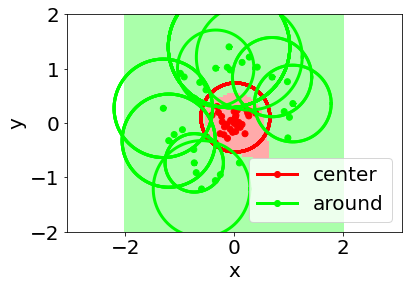

In [33]:
C=CSC()
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
C.plot_centers()
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])


## 8x8 - Autoencoder

In [3]:
vectors=eye(8)
targets=arange(8)
print((vectors,targets))

(array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]]), array([0, 1, 2, 3, 4, 5, 6, 7]))


In [4]:
import pandas as pd

In [7]:
pd.DataFrame(vectors).to_excel('/Users/bblais/Downloads/eye.xlsx')

In [43]:
targets

array([0, 1, 2, 3, 4, 5, 6, 7])

In [60]:
C=NumPyNetBackProp({
    'input':8,               # number of features
    'hidden':[(3,'logistic'),],  # bottleneck (num hidden < num inputs)
    'output':(8,'logistic'),  # number of classes
    'cost':'mse',
})


In [61]:
C.fit(vectors,targets,epochs=10000)
print(("On Training Set:",C.percent_correct(vectors,targets)))
print((C.predict(vectors)))

  1%|          | 64/10000 [00:00<00:15, 639.25it/s]

layer       filters  size              input                output
   0 input                     8 x   1 x   1 x   8   ->     8 x   1 x   1 x   8
   1 connected                 8 x   1 x   1 x   8   ->     8 x   3
   2 connected                 8 x   1 x   1 x   3   ->     8 x   8
   3 cost                      8 x   1 x   1 x   8   ->     8 x   1 x   1 x   8


100%|██████████| 10000/10000 [00:11<00:00, 883.55it/s]

('On Training Set:', 100.0)
[0 1 2 3 4 5 6 7]


In [62]:
h,y=C.output(vectors)

In [63]:
around(h,2)

array([[1.  , 0.  , 0.92],
       [0.99, 0.99, 0.98],
       [0.4 , 0.99, 0.  ],
       [0.07, 0.  , 0.99],
       [0.01, 0.49, 0.27],
       [0.01, 0.98, 1.  ],
       [0.99, 0.48, 0.  ],
       [0.32, 0.01, 0.01]])

In [64]:
h.round()

array([[1., 0., 1.],
       [1., 1., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [65]:
y.round()

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [66]:
C.predict(vectors)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [67]:
y.shape

(8, 8)

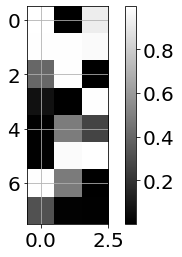

In [68]:
imshow(h,interpolation='nearest',cmap=cm.gray)
colorbar()

In [69]:
weights_xh,weights_hy=C.weights

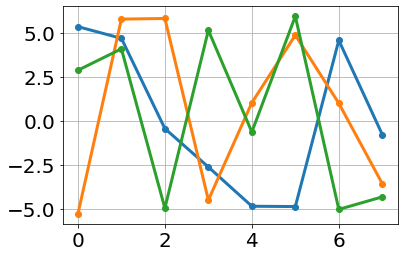

In [73]:
plot(weights_xh,'-o');

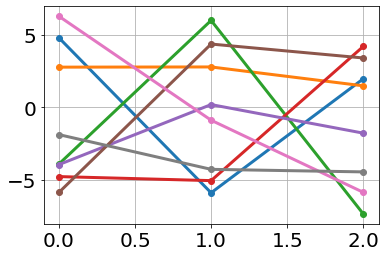

In [72]:
plot(weights_hy,'-o');